# Content Based Filtering
- Ürün içeriklerinin benzerlikleri üzerinden tavsiyeler geliştirilir.<br>
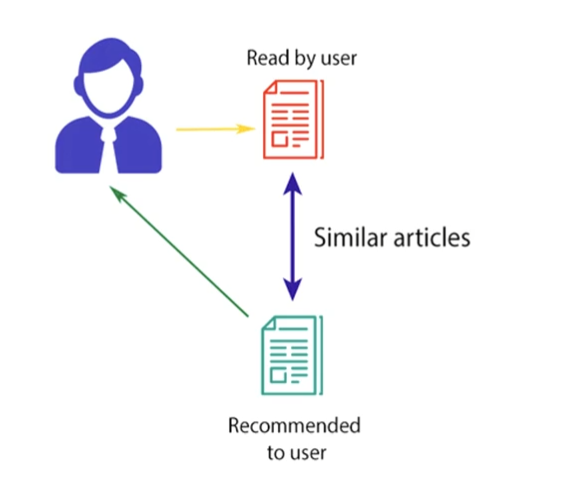

## Count Vectorizer (Metin Vektörleştirme)
- Metinsel ifadelere uzaklık temelli bazı işlemler yapılmak istenildiğinde kullanılır.
## TF-IDF
- Kelimelerin hem kendi metninde hem de tüm metinlerde geçme sayısı üzerinden bir normalizasyon işlemi yapar.
1. Count Vectorizer'ı hesaplar
2. TF-Term Frequency'i hesapla (ilgili dökümandaki frekans / dökümandaki toplam terim sayısı)
3. IDF - Inverse Document Frequency Hesaplanması (1 + loge ((toplam döküman sayısı + 1)/(içinde t terimi olan döküman sayısı+1)))
4. TF*IDF Hesapla
5. L2 Normalizasyonu Yap
    - Satırların kareleri toplamının karekökünü bul, ilgili satırdaki tüm hücreleri bulduğun değere böl

## Content Based Recommender System (İçerik TEmmeli Tavsiye Sistemi)
1. TF-IDF Matrisinin Oluşturulması
2. Cosine Similarity Matrisinin Oluşturulması
3. Benzerliklere Göre Önerilerin Yapılması
4. İşlemin Fonksiyonlaştırılması

1. TF-IDF Matrisinin Oluşturulması

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

df = pd.read_csv("C:/recommender/datasets/the_movies_dataset/movies_metadata.csv", low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [2]:
df["overview"].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [3]:
tfidf = TfidfVectorizer(stop_words="english")
df["overview"] = df["overview"].fillna("")
tfidf_matrix = tfidf.fit_transform(df["overview"])

In [4]:
tfidf_matrix.shape

(45466, 75827)

In [7]:
tfidf.get_feature_names()

C:\Users\suley\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '000km',
 '000th',
 '001',
 '006',
 '007',
 '008',
 '009',
 '0093',
 '01',
 '0123',
 '02',
 '03',
 '04',
 '042',
 '05',
 '05pm',
 '06',
 '07',
 '077',
 '07am',
 '08',
 '088',
 '09',
 '10',
 '100',
 '1000',
 '10000',
 '1000s',
 '1000th',
 '1001',
 '100th',
 '101',
 '101st',
 '103',
 '103rd',
 '104',
 '105',
 '1066',
 '108',
 '1080s',
 '108th',
 '109',
 '10b',
 '10crores',
 '10mn',
 '10th',
 '10x',
 '11',
 '110',
 '1100',
 '111',
 '112',
 '1138',
 '114',
 '115',
 '117',
 '117a',
 '118',
 '1183',
 '119',
 '11s',
 '11th',
 '12',
 '120',
 '1200',
 '1200s',
 '1206',
 '1215',
 '1218',
 '1227',
 '125',
 '1250',
 '125th',
 '1263',
 '129',
 '12th',
 '13',
 '130',
 '1300',
 '1300s',
 '1302',
 '1303',
 '133',
 '134',
 '1344',
 '1348',
 '1349',
 '138',
 '13anos',
 '13b',
 '13s',
 '13th',
 '14',
 '140',
 '1400',
 '1408',
 '1413',
 '142',
 '1429',
 '143',
 '144',
 '145',
 '1458',
 '146',
 '1463',
 '1466',
 '1472',
 '1475',
 '148',
 '1482',
 '1483',
 '1492',
 '14pm',
 '14th',
 '15',
 '

In [8]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

2. Cosine Sim Matrisinin Oluşturulması

In [9]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [10]:
cosine_sim.shape
# Her bir filmin her bir filmle olan benzerliği var

(45466, 45466)

In [12]:
cosine_sim[0]

array([1.        , 0.01504121, 0.        , ..., 0.        , 0.00595453,
       0.        ])

3. Benzerliklere Göre Önerilerin Yapılması

In [13]:
titles = pd.Series(df.index, index=df["title"])
titles[0:5]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
dtype: int64

In [14]:
titles.index.value_counts()

Cinderella              11
Hamlet                   9
Alice in Wonderland      9
Beauty and the Beast     8
Les Misérables           8
                        ..
Cluny Brown              1
Babies                   1
The Green Room           1
Captain Conan            1
Queerama                 1
Name: title, Length: 42277, dtype: int64

In [15]:
titles = titles[~titles.index.duplicated(keep="last")]
titles.index.value_counts()

Toy Story                   1
Russell Madness             1
Attack of the Sabretooth    1
The Millennials             1
X/Y                         1
                           ..
Wife! Be Like a Rose!       1
Adelheid                    1
PEEPLI [Live]               1
The Moth                    1
Queerama                    1
Name: title, Length: 42277, dtype: int64

In [16]:
movie_index = titles["Sherlock Holmes"]

In [17]:
cosine_sim[movie_index]

array([0.        , 0.00392837, 0.00476764, ..., 0.        , 0.0067919 ,
       0.        ])

In [18]:
similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
similarity_scores

,score
0,0.000000
1,0.003928
2,0.004768
3,0.000000
4,0.000000
...,...
45461,0.000000
45462,0.000000
45463,0.000000
45464,0.006792


In [24]:
movie_index = similarity_scores.sort_values("score", ascending=False)[1:11].index

In [25]:
df["title"].iloc[movie_index]

34737    Приключения Шерлока Холмса и доктора Ватсона: ...
14821                                    The Royal Scandal
34750    The Adventures of Sherlock Holmes and Doctor W...
9743                           The Seven-Per-Cent Solution
4434                                        Without a Clue
29706                       How Sherlock Changed the World
18258                   Sherlock Holmes: A Game of Shadows
24665     The Sign of Four: Sherlock Holmes' Greatest Case
6432                   The Private Life of Sherlock Holmes
29154                          Sherlock Holmes in New York
Name: title, dtype: object

In [30]:
def content_based_recommender(title, cosine_sim, dataframe):
    # index'leri olusturma
    indices = pd.Series(dataframe.index, index=dataframe['title'])
    indices = indices[~indices.index.duplicated(keep='last')]
    # title'ın index'ini yakalama
    movie_index = indices[title]
    # title'a gore benzerlik skorlarını hesapalama
    similarity_scores = pd.DataFrame(cosine_sim[movie_index], columns=["score"])
    # kendisi haric ilk 10 filmi getirme
    movie_indices = similarity_scores.sort_values("score", ascending=False)[1:11].index
    return dataframe['title'].iloc[movie_indices]

content_based_recommender("Sherlock Holmes", cosine_sim, df)

content_based_recommender("The Matrix", cosine_sim, df)

content_based_recommender("The Godfather", cosine_sim, df)

content_based_recommender('The Dark Knight Rises', cosine_sim, df)

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object

In [33]:
def calculate_cosine_sim(dataframe):
    tfidf = TfidfVectorizer(stop_words='english')
    dataframe['overview'] = dataframe['overview'].fillna('')
    tfidf_matrix = tfidf.fit_transform(dataframe['overview'])
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return cosine_sim

df = pd.read_csv("C:/recommender/datasets/the_movies_dataset/movies_metadata.csv", low_memory=False)
cosine_sim = calculate_cosine_sim(df)

MemoryError: Unable to allocate 2.04 GiB for an array with shape (546860044,) and data type int32

In [34]:
content_based_recommender('The Dark Knight Rises', cosine_sim, df)

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object